In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## World Analysis

In [2]:
df = pd.read_csv('./Data/world_info.csv')

df.columns = ['Unnamed','Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 
           'Active Cases', 'Critical cases', 'Cases per 1M']
df = df.set_index('Country')
df = df.drop(df.columns[[0]], axis=1)

df.drop(df.tail(1).index,inplace=True)        #removes total row

df.head()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical cases,Cases per 1M
Country,,,,,,,,
China,80967,+39,3248.0,3.0,71150.0,6569,2136.0,56.0
Italy,47021,"+5,986",4032.0,627.0,5129.0,37860,2655.0,778.0
Spain,20412,"+2,335",1050.0,219.0,1588.0,17774,939.0,437.0
Germany,19848,"+4,528",67.0,23.0,180.0,19601,2.0,237.0
Iran,19644,"+1,237",1433.0,149.0,6745.0,11466,0.0,234.0


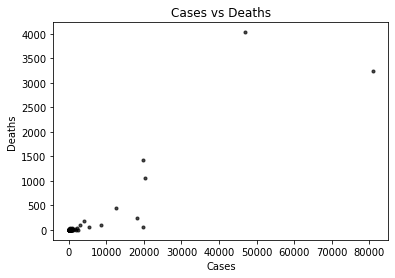

In [3]:
#Plot cases vs deaths on a scatter plot
x = df.loc[:,'Total Cases']
y = df.loc[:,'Total Deaths']
colors = 'black'
area = np.pi*3

plt.scatter(x, y, s=area, c=colors, alpha=0.7)
plt.title('Cases vs Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')

plt.show()

Text(0, 0.5, 'Deaths')

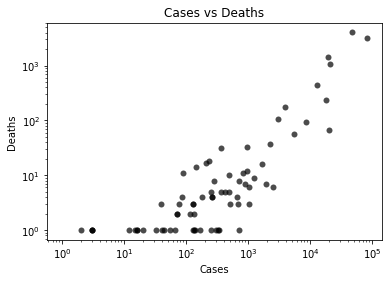

In [4]:
fig = plt.figure()
ax = plt.gca()

ax.plot(x,y, 'o', c='black', alpha=0.7, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('Cases vs Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')

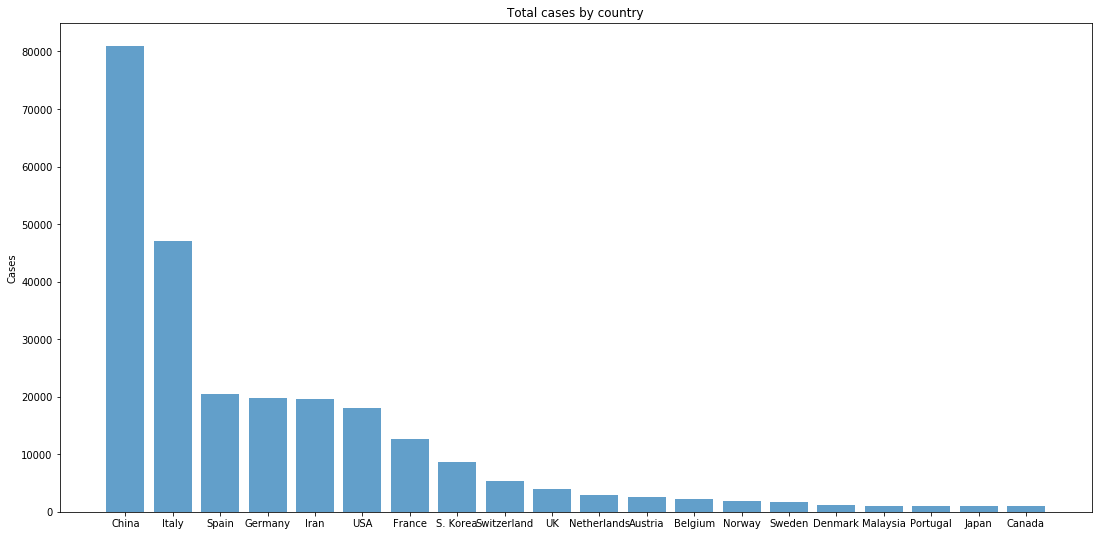

In [5]:
#bar chart of total cases by country
df = df.sort_values(by='Total Cases', ascending=0)
objects = df.index[0:20]
y_pos = np.arange(len(objects))
x = df.iloc[0:20,0]

plt.bar(y_pos, x, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Cases')
plt.title('Total cases by country')

fig = plt.gcf()
fig.set_size_inches(18.5, 9)
plt.show()


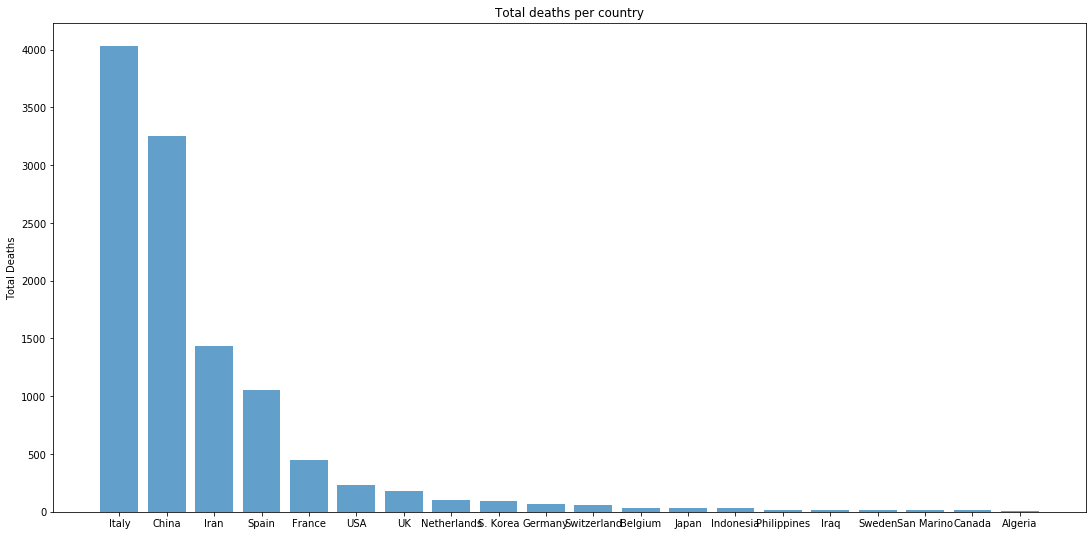

In [6]:
#bar chart of deaths by country
df = df.sort_values(by='Total Deaths', ascending=0)
objects = df.index[0:20]
y_pos = np.arange(len(objects))
x = df.iloc[0:20,2]

plt.bar(y_pos, x, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Total Deaths')
plt.title('Total deaths per country')

fig = plt.gcf()
fig.set_size_inches(18.5, 9)
plt.show()


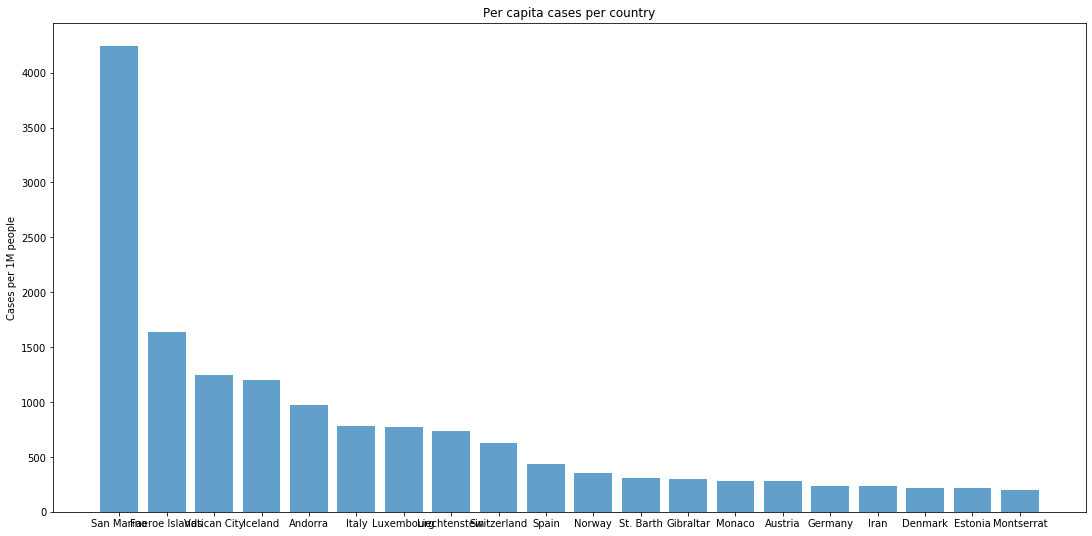

In [7]:
#bar chart of cases per capita
df = df.sort_values(by='Cases per 1M', ascending=0)
objects = df.index[0:20]
y_pos = np.arange(len(objects))
x = df.iloc[0:20,7]

plt.bar(y_pos, x, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Cases per 1M people')
plt.title('Per capita cases per country')

fig = plt.gcf()
fig.set_size_inches(18.5, 9)
plt.show()


## Cases Analysis

In [19]:
df_cases = pd.read_csv('./Data/Stats/Cases.csv')

df_cases = df_cases.set_index('Dates')

#df_cases.tail()

c:\users\jason collis\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
c:\users\jason collis\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


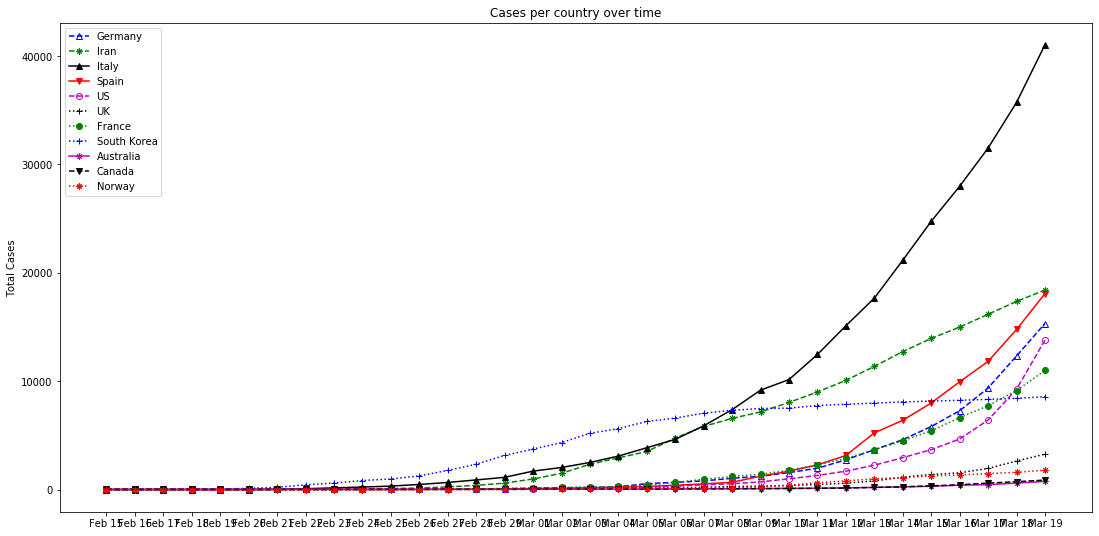

In [20]:
#cases over time
x = df_cases.index
germany = df_cases.loc[:,'Germany']
iran = df_cases.loc[:,'Iran']
italy = df_cases.loc[:,'Italy']
spain = df_cases.loc[:,'Spain']
US = df_cases.loc[:,'US']
UK = df_cases.loc[:,'UK']
france = df_cases.loc[:,'France']
south_korea = df_cases.loc[:,'South Korea']
australia = df_cases.loc[:,'Australia']
canada = df_cases.loc[:,'Canada']
norway = df_cases.loc[:,'Norway']

fig=plt.figure()
fig.show()
fig.set_size_inches(18.5, 9)
plt.ylabel('Total Cases')
plt.title('Cases per country over time')
ax=fig.add_subplot(111)

ax.plot(x,germany,c='b',marker="^",ls='--',label='Germany',fillstyle='none')
ax.plot(x,iran,c='g',marker=(8,2,0),ls='--',label='Iran')
ax.plot(x,italy,c='k',marker="^",ls='-',label='Italy')
ax.plot(x,spain,c='r',marker="v",ls='-',label='Spain')
ax.plot(x,US,c='m',marker="o",ls='--',label='US',fillstyle='none')
ax.plot(x,UK,c='k',marker="+",ls=':',label='UK')
ax.plot(x,france,c='g',marker="o",ls=':',label='France')
ax.plot(x,south_korea,c='b',marker="+",ls=':',label='South Korea')
ax.plot(x,australia,c='m',marker=(8,2,0),ls='-',label='Australia')
ax.plot(x,canada,c='k',marker="v",ls='--',label='Canada')
ax.plot(x,norway,c='r',marker=(8,2,0),ls=':',label='Norway')

plt.legend(loc=2)
plt.draw()

In [10]:
#cases over time since reaching 100 cases
df_cases = pd.read_csv('./Data/Stats/Cases.csv')

df_cases = df_cases.set_index('Dates')

germany = df_cases.loc[:,'Germany']
iran = df_cases.loc[:,'Iran']
italy = df_cases.loc[:,'Italy']
spain = df_cases.loc[:,'Spain']
US = df_cases.loc[:,'US']
UK = df_cases.loc[:,'UK']
france = df_cases.loc[:,'France']
south_korea = df_cases.loc[:,'South Korea']
l = [0]

for country in df_cases:
    count = 0
    for x in df_cases[country]:
        if x < 100:
            count=count+1
            l.append(count)
    df_cases[country] = df_cases[country].iloc[count:]
    
max_days = max(l)
max_days


19

## Deaths analysis

In [ ]:
df_deaths = pd.read_csv('./Data/Stats/Deaths.csv')

df_deaths = df_deaths.set_index('Dates')

#df_cases.tail()